<a href="https://colab.research.google.com/github/yoshitha2005/OIBSIP/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<ipython-input-3-2d6c6b1db266>:62: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=new_df, x=feature_names[0], y=feature_names[1], hue='Species', style='Species', markers=['X'], s=200, palette='Set1', legend=False)


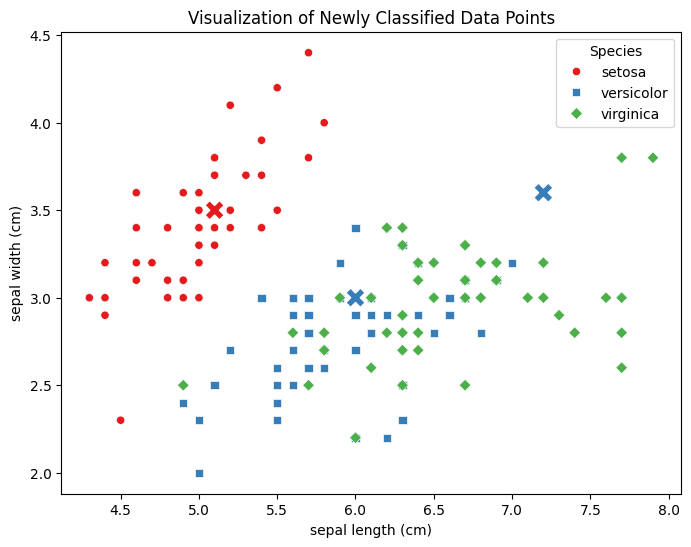

New Data Point 1: Predicted Species = setosa
New Data Point 2: Predicted Species = virginica
New Data Point 3: Predicted Species = virginica


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Preprocess the data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Choose a model (K-Nearest Neighbors in this case)
model = KNeighborsClassifier(n_neighbors=3)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 8: Use the model to make predictions on new data (example)
new_data = [[5.1, 3.5, 1.4, 0.2],  # Example new data point 1
            [6.0, 3.0, 4.8, 1.8],  # Example new data point 2
            [7.2, 3.6, 6.1, 2.5]]  # Example new data point 3
new_data_scaled = scaler.transform(new_data)
predicted_species = model.predict(new_data_scaled)

# Add the new data points to the original DataFrame for visualization
new_df = pd.DataFrame(new_data, columns=feature_names)
new_df['Species'] = predicted_species
new_df['Species'] = new_df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Step 9: Visualize the new data points along with the original data
# Use the first two features for simplicity (e.g., sepal length and sepal width)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=feature_names[0], y=feature_names[1], hue='Species', style='Species', markers=['o', 's', 'D'], palette='Set1')
sns.scatterplot(data=new_df, x=feature_names[0], y=feature_names[1], hue='Species', style='Species', markers=['X'], s=200, palette='Set1', legend=False)
plt.title('Visualization of Newly Classified Data Points')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Species')
plt.show()

# Print the predicted species for the new data points
for i, species in enumerate(predicted_species):
    print(f"New Data Point {i + 1}: Predicted Species = {iris.target_names[species]}")